In [1]:
# Data Processing
import pandas as pd
import numpy as np
import seaborn as sns

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Visualisation 
from matplotlib import pyplot as plt
# Tree Visualisation
# from sklearn.tree import export_graphviz
# from IPython.display import Image
# import graphviz

In [2]:
# Step 2 : import data
df = pd.read_csv('M6_T2_V1_Diamonds.csv')
df2 = pd.read_csv('M6_T2_V1_Diamonds.csv')

In [3]:
# Step 3 : define target (y) and features (X)
print(df)

       carat        cut color clarity  price     x     y     z
0       0.23      Ideal     E     SI2    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1    326  3.89  3.84  2.31
2       0.23       Good     E     VS1    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2    334  4.20  4.23  2.63
4       0.31       Good     J     SI2    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   2757  5.83  5.87  3.64

[53940 rows x 8 columns]


In [4]:
# Mapping string values to numeric
cut_mapping = {"Fair": 1, "Good": 2, "Very Good": 3, "Ideal": 4, "Premium": 5}
clarity_mapping = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}
color_mapping = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7}

df['cut'] = df['cut'].map(cut_mapping)
df['clarity'] = df['clarity'].map(clarity_mapping)
df['color'] = df['color'].map(color_mapping)

# Convert to float32
df['carat'] = df['carat'].astype('float32')
df['cut'] = df['cut'].astype('float32')
df['color'] = df['color'].astype('float32')
df['clarity'] = df['clarity'].astype('float32')
df['price'] = df['price'].astype('int32')
df['x'] = df['x'].astype('float32')
df['y'] = df['y'].astype('float32')
df['z'] = df['z'].astype('float32')

df2=df

print(df.dtypes)

carat      float32
cut        float32
color      float32
clarity    float32
price        int32
x          float32
y          float32
z          float32
dtype: object


In [5]:
# Split the data into features (X) and target (y)
df=df[:4950]
X = df.drop(['price'], axis=1)
print(X)
y = df['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

      carat  cut  color  clarity     x     y     z
0      0.23  4.0    6.0      2.0  3.95  3.98  2.43
1      0.21  5.0    6.0      3.0  3.89  3.84  2.31
2      0.23  2.0    6.0      5.0  4.05  4.07  2.31
3      0.29  5.0    2.0      4.0  4.20  4.23  2.63
4      0.31  2.0    1.0      2.0  4.34  4.35  2.75
...     ...  ...    ...      ...   ...   ...   ...
4945   1.27  5.0    2.0      1.0  7.05  7.00  4.23
4946   1.01  4.0    5.0      2.0  6.44  6.38  4.00
4947   1.01  5.0    5.0      2.0  6.38  6.32  3.98
4948   1.15  2.0    1.0      2.0  6.63  6.56  4.21
4949   1.01  2.0    4.0      3.0  6.34  6.31  4.07

[4950 rows x 7 columns]


In [6]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

      carat  cut  color  clarity     x     y     z
4784   1.10  2.0    3.0      2.0  6.82  6.73  3.90
355    0.73  4.0    6.0      2.0  5.77  5.81  3.58
582    0.77  4.0    6.0      2.0  6.01  5.95  3.63
3518   0.81  4.0    6.0      3.0  5.95  5.99  3.72
2905   0.80  2.0    5.0      4.0  5.97  6.01  3.62
2148   0.57  4.0    7.0      7.0  5.33  5.35  3.29
145    0.70  2.0    3.0      6.0  5.62  5.65  3.50
2504   1.00  1.0    1.0      2.0  6.58  6.54  3.69
4989   0.72  4.0    5.0      6.0  5.72  5.74  3.57
1915   0.71  4.0    6.0      5.0  5.74  5.70  3.56
4784    3696
355     2805
582     2834
3518    3404
2905    3283
2148    3126
145     2767
2504    3199
4989    3740
1915    3081
Name: price, dtype: int32
[3696 3129 2834 3404 3283 3126 2767 3199 3093 2866]


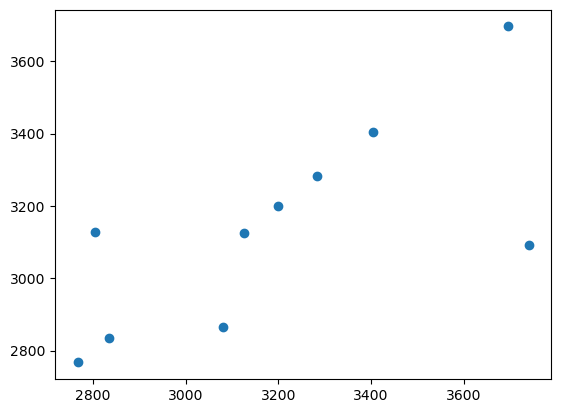

In [7]:
X_test_temp=df2.loc[0:4999,['carat','cut','color','clarity','price','x','y','z']]
X_test_temp=X_test_temp.sample(10)
X_test=X_test_temp.drop(['price'], axis=1)
y_test=X_test_temp['price']

print(X_test)
print(y_test)
# X_test=X_test.drop(['price'], axis=1)
y_pred = rf.predict(X_test)

print(y_pred)

plt.scatter(y_test, y_pred)
plt.show()

      carat  cut  color  clarity     x     y     z
1374   0.75  4.0    5.0      3.0  5.87  5.92  3.61
1180   0.71  4.0    4.0      5.0  5.69  5.73  3.58
2658   0.70  3.0    4.0      6.0  5.78  5.85  3.49
3243   0.71  4.0    6.0      5.0  5.67  5.71  3.55
462    0.70  5.0    6.0      4.0  5.66  5.63  3.52
4130   0.70  3.0    4.0      8.0  5.83  5.87  3.42
2786   0.79  4.0    6.0      3.0  5.97  5.89  3.67
1808   1.01  5.0    3.0      2.0  6.46  6.41  3.93
4158   0.76  3.0    4.0      6.0  5.79  5.84  3.62
1901   0.76  4.0    6.0      4.0  5.79  5.83  3.56
1374    2966
1180    2930
2658    3235
3243    3354
462     2818
4130    3543
2786    3256
1808    3054
4158    3549
1901    3079
Name: price, dtype: int32
[2966 3431 2905 3354 2818 3543 3053 3054 3549 3079]


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().